# 수정사항
* 계산식을 코드로 바로 입력
* Nan data table 수정( 완료 )
* 추가데이터와 비교 (ex. 3월, 12월 \
             코로나 확진자 증가, 거리두기 단계 변화와 비교 )
* plot -> pointplot 로 변경
* heatmap(corr)
    *시간 -> 지역
    *요일 -> 월~일
    ----------------------------------
*ppt 제작
*

- 주제 선정 동기, 개요, 목적등
 * 대중교통이 감소하였고, 그럼 일반 자동차 통행량이 증가하였을까?
    

- 데이터 수집 방법

- 데이터 처리 및 분석

    - 분석 방법 : 빈도분석, 기술통계분석, 상관계수분석.

    가설 1
    데이터 설명 및 인사이트 도출 과정 (아주 간단히) 및 시각화
    결론 1

    가설 2
    데이터 설명 및 인사이트 도출 과정 (아주 간단히) 및 시각화
    결론 2

    …

- 추후 개선 및 느낀점

In [1]:
pwd

'/Users/ijiyeong'

In [2]:
%cd

/Users/ijiyeong


In [3]:
%cd seoultraffic/

/Users/ijiyeong/seoultraffic


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
import seaborn as sns
import matplotlib.font_manager as fm
import missingno as msno #결측데이터 검색
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [5]:
# 폰트설정
from matplotlib import font_manager
plt.rcParams["font.family"] = 'NanumGothicCoding'
from matplotlib import rc
rc('font', family="Arial Unicode MS")

In [6]:
### 2019 pub_transpor data road
df1 = pd.read_csv("2019.csv")
### 2020 pub_transpor data road
df2 = pd.read_csv("2020.csv")
### 2019 Traffic data road
ddf1 = pd.read_csv("data_2019_seoultraffic.csv")
### 2019 Traffic data road
ddf2 = pd.read_csv("data_2020_seoultraffic.csv")

### 월별 Pub_transpor data 2019

In [7]:
pub_traffic_m_2019 = df1.pivot_table("count", "월", "시간", aggfunc=np.sum)
pub_traffic_m_2019.tail(1)

시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
월,,,,,,,,,,,,,,,,,,,,,
2019-12,5374999,894129,284658,205711,1508785,7102122,15312007,36548547,61293678,42821402,...,36315505,39572005,44295328,51354740,63240031,45627653,32970482,31787814,29838776,17951621


In [8]:
pub_traffic_m_2019.loc[:, "total"] = pub_traffic_m_2019.sum(axis=1)
pub_traffic_m_2019.tail(1)

시간,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,total
월,,,,,,,,,,,,,,,,,,,,,
2019-12,5374999,894129,284658,205711,1508785,7102122,15312007,36548547,61293678,42821402,...,39572005,44295328,51354740,63240031,45627653,32970482,31787814,29838776,17951621,697837963


### 지역 Pub_transpor data 2019

In [9]:
pub_traffic_r_2019 = df1.pivot_table("count", "지명", "시간", aggfunc=np.sum)
pub_traffic_r_2019.tail(1)

시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
지명,,,,,,,,,,,,,,,,,,,,,
중랑구,1429246,237634,75320,66496,865449,3163495,6457136,15182553,22283249,13902473,...,9500318,10034266,11444769,12500258,14244402,12439521,8442147,7587105,6741702,3980054


In [10]:
pub_traffic_r_2019.loc[:, "total"] = pub_traffic_r_2019.sum(axis=1)
pub_traffic_r_2019.tail(1)

시간,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,total
지명,,,,,,,,,,,,,,,,,,,,,
중랑구,1429246,237634,75320,66496,865449,3163495,6457136,15182553,22283249,13902473,...,10034266,11444769,12500258,14244402,12439521,8442147,7587105,6741702,3980054,199074236


### 월별 일반_transpor data 2019

In [11]:
all_traffic_m_2019 = ddf1.pivot_table("total", "month")
all_traffic_m_2019.tail(2)

,total
month,
11,72354.783704
12,71778.392115


In [12]:
all_traffic_m_2019.loc[:, "total"] = all_traffic_m_2019.sum(axis=1)
all_traffic_m_2019.tail(2)

,total
month,
11,72354.783704
12,71778.392115


### 지역 일반_transpor data 2019

In [13]:
all_traffic_r_2019 = ddf1.pivot_table("total", "구")
all_traffic_r_2019.tail(2)

,total
구,
영등포구,70866.447123
중구,37562.815068


### 월별 Pub_transpor data 2020

In [14]:
pub_traffic_m_2020 = df2.pivot_table("count", "월", "시간", aggfunc=np.sum)
pub_traffic_m_2020.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
월,,,,,,,,,,,,,,,,,,,,,
2020-11,2098081,349867,155377,130386,1329355,6136505,13402605,32537726,52019524,33591727,...,25337088,27905265,31454781,38669351,50479289,34838703,23676409,22284310,18204449,9614244
2020-12,768884,144747,81844,79404,1185775,5460206,11851038,27047114,44277285,28695709,...,21300746,23283325,25506856,31762247,41623937,28400927,19939147,19568978,9363563,4006368


In [15]:
pub_traffic_m_2020.loc[:, "total"] = pub_traffic_m_2020.sum(axis=1)
pub_traffic_m_2020.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,total
월,,,,,,,,,,,,,,,,,,,,,
2020-11,2098081,349867,155377,130386,1329355,6136505,13402605,32537726,52019524,33591727,...,27905265,31454781,38669351,50479289,34838703,23676409,22284310,18204449,9614244,516629667
2020-12,768884,144747,81844,79404,1185775,5460206,11851038,27047114,44277285,28695709,...,23283325,25506856,31762247,41623937,28400927,19939147,19568978,9363563,4006368,421314351


### 지역 Pub_transpor data 2020

In [16]:
pub_traffic_r_2020 = df2.pivot_table("count", "지명", "시간", aggfunc=np.sum)
pub_traffic_r_2020.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
지명,,,,,,,,,,,,,,,,,,,,,
중구,1030686,267406,125901,144638,524518,2845992,6134273,15971819,33999864,20472449,...,14554400,15679344,17012446,23538009,33093127,18656846,13260295,11477169,8628758,4649330
중랑구,999460,179205,71499,63145,722886,2550547,4890796,10808463,14961209,8788647,...,7304112,8024669,8997200,10484633,13326202,11698006,7464722,6621289,5495151,3253670


In [17]:
pub_traffic_r_2020.loc[:, "total"] = pub_traffic_r_2020.sum(axis=1)
pub_traffic_r_2020.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,total
지명,,,,,,,,,,,,,,,,,,,,,
중구,1030686,267406,125901,144638,524518,2845992,6134273,15971819,33999864,20472449,...,15679344,17012446,23538009,33093127,18656846,13260295,11477169,8628758,4649330,295154710
중랑구,999460,179205,71499,63145,722886,2550547,4890796,10808463,14961209,8788647,...,8024669,8997200,10484633,13326202,11698006,7464722,6621289,5495151,3253670,153829883


### 월별 일반_transpor data 2020

In [18]:
all_traffic_m_2020 = ddf2.pivot_table("total", "month")
all_traffic_m_2020.tail(2)

,total
month,
11,65578.097531
12,59918.407885


In [19]:
all_traffic_m_2020.loc[:, "total"] = all_traffic_m_2020.sum(axis=1)
all_traffic_m_2020.tail(2)

,total
month,
11,65578.097531
12,59918.407885


### 지역 일반_transpor data 2020

In [20]:
all_traffic_r_2020 = ddf2.pivot_table("total", "구")
all_traffic_r_2020.tail(2)

,total
구,
영등포구,61907.190164
중구,31362.805328


###  * 결측 데이터 검색

In [21]:
df1.isna().sum()

날짜       0
시간       0
지명       0
발생량      0
도착량      0
count    0
월        0
dtype: int64

In [22]:
df2.isna().sum()

날짜       0
시간       0
지명       0
발생량      0
도착량      0
count    0
월        0
dtype: int64

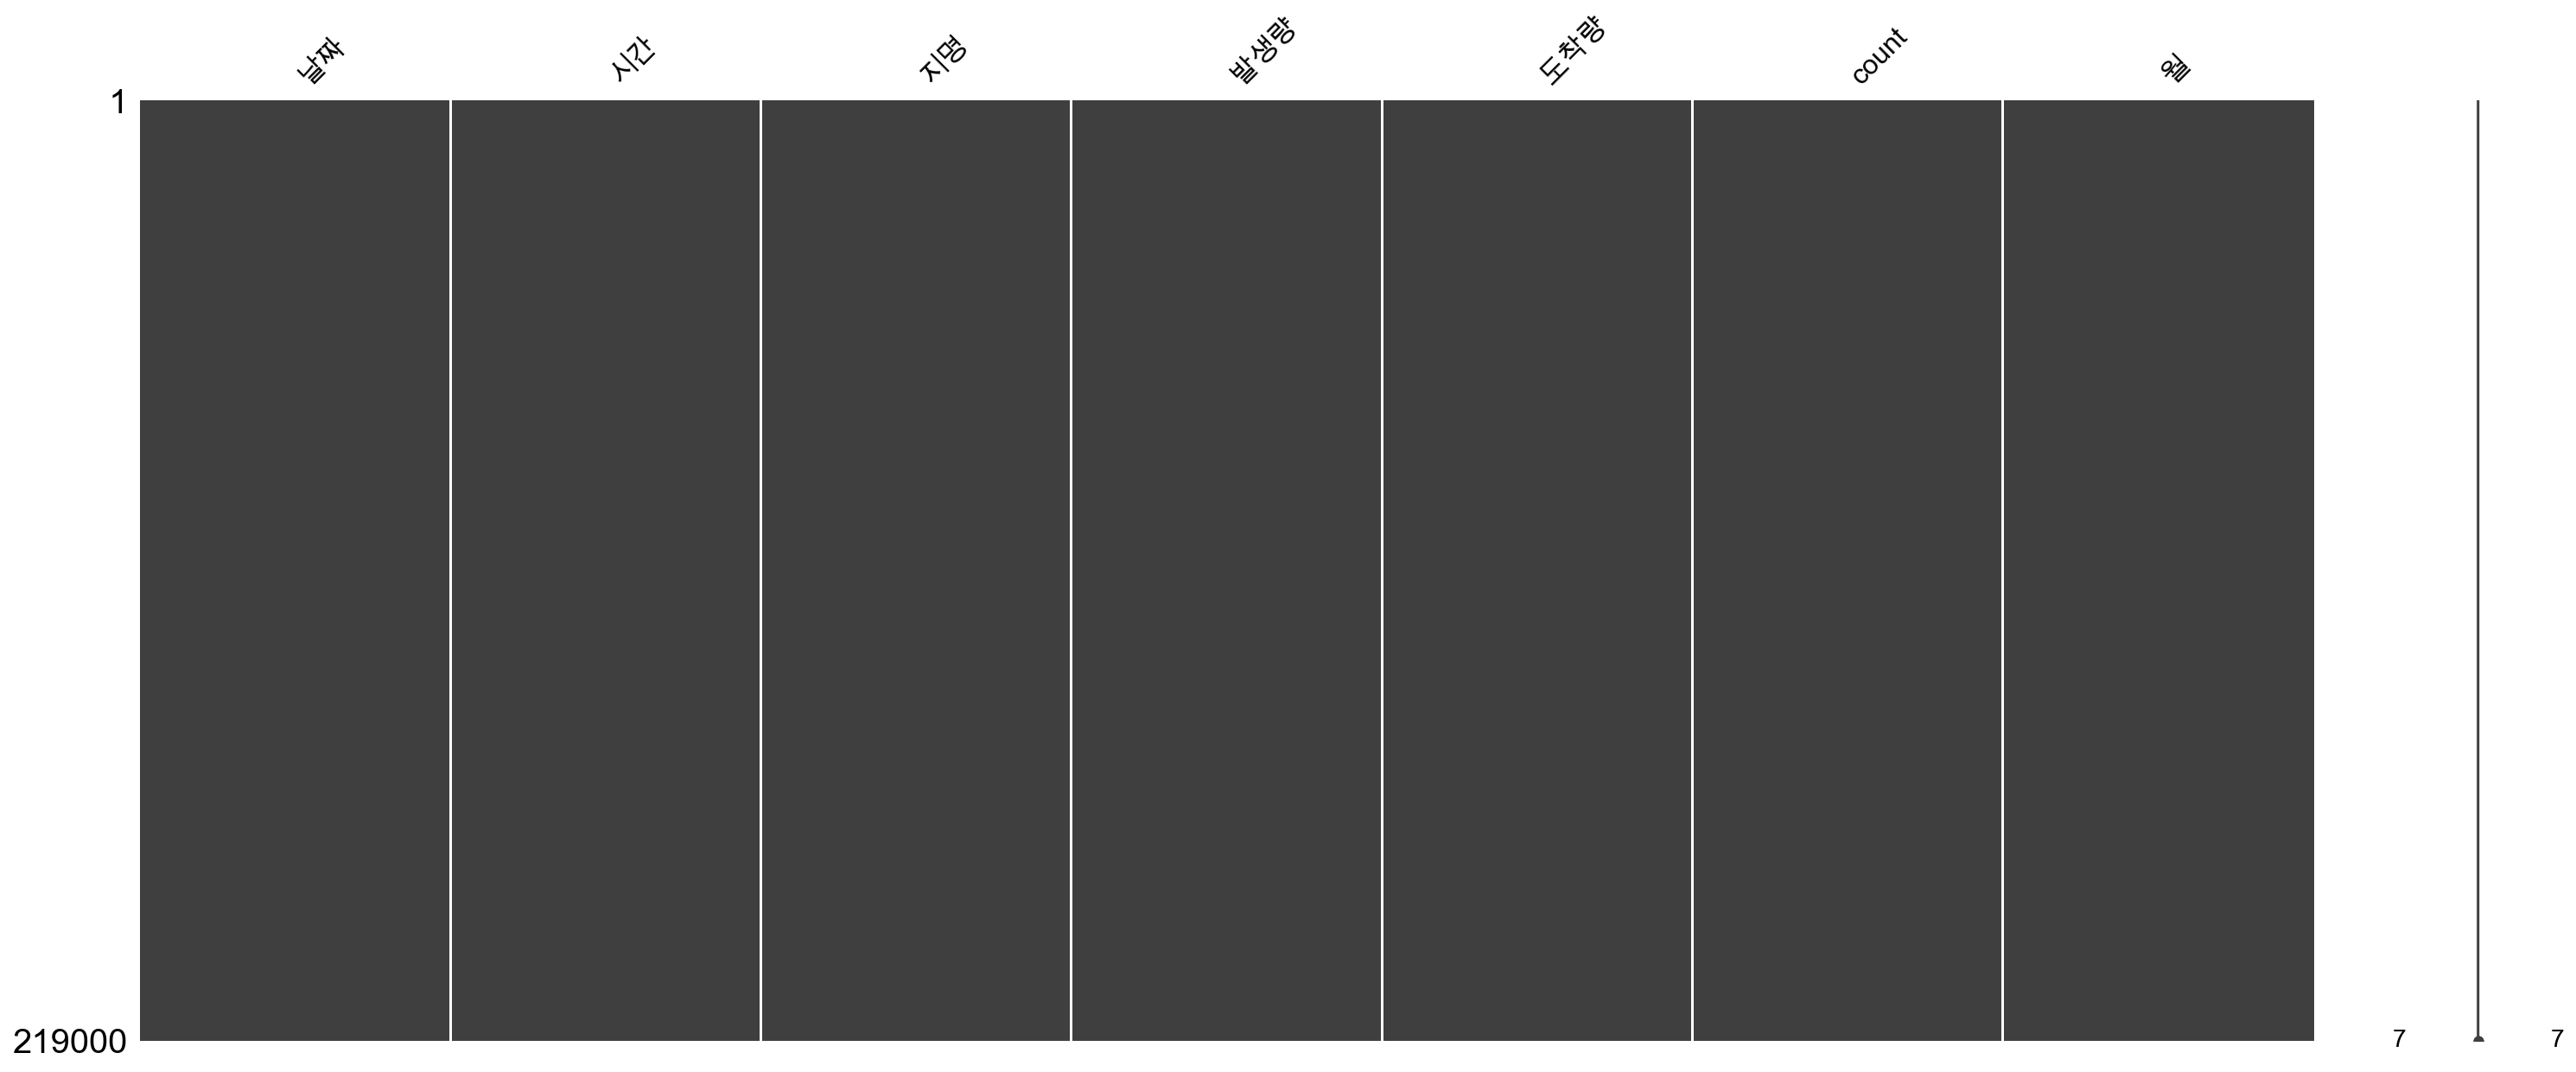

In [23]:
msno.matrix(df1)
plt.show()

#warnings.filterwarnings('ignore')

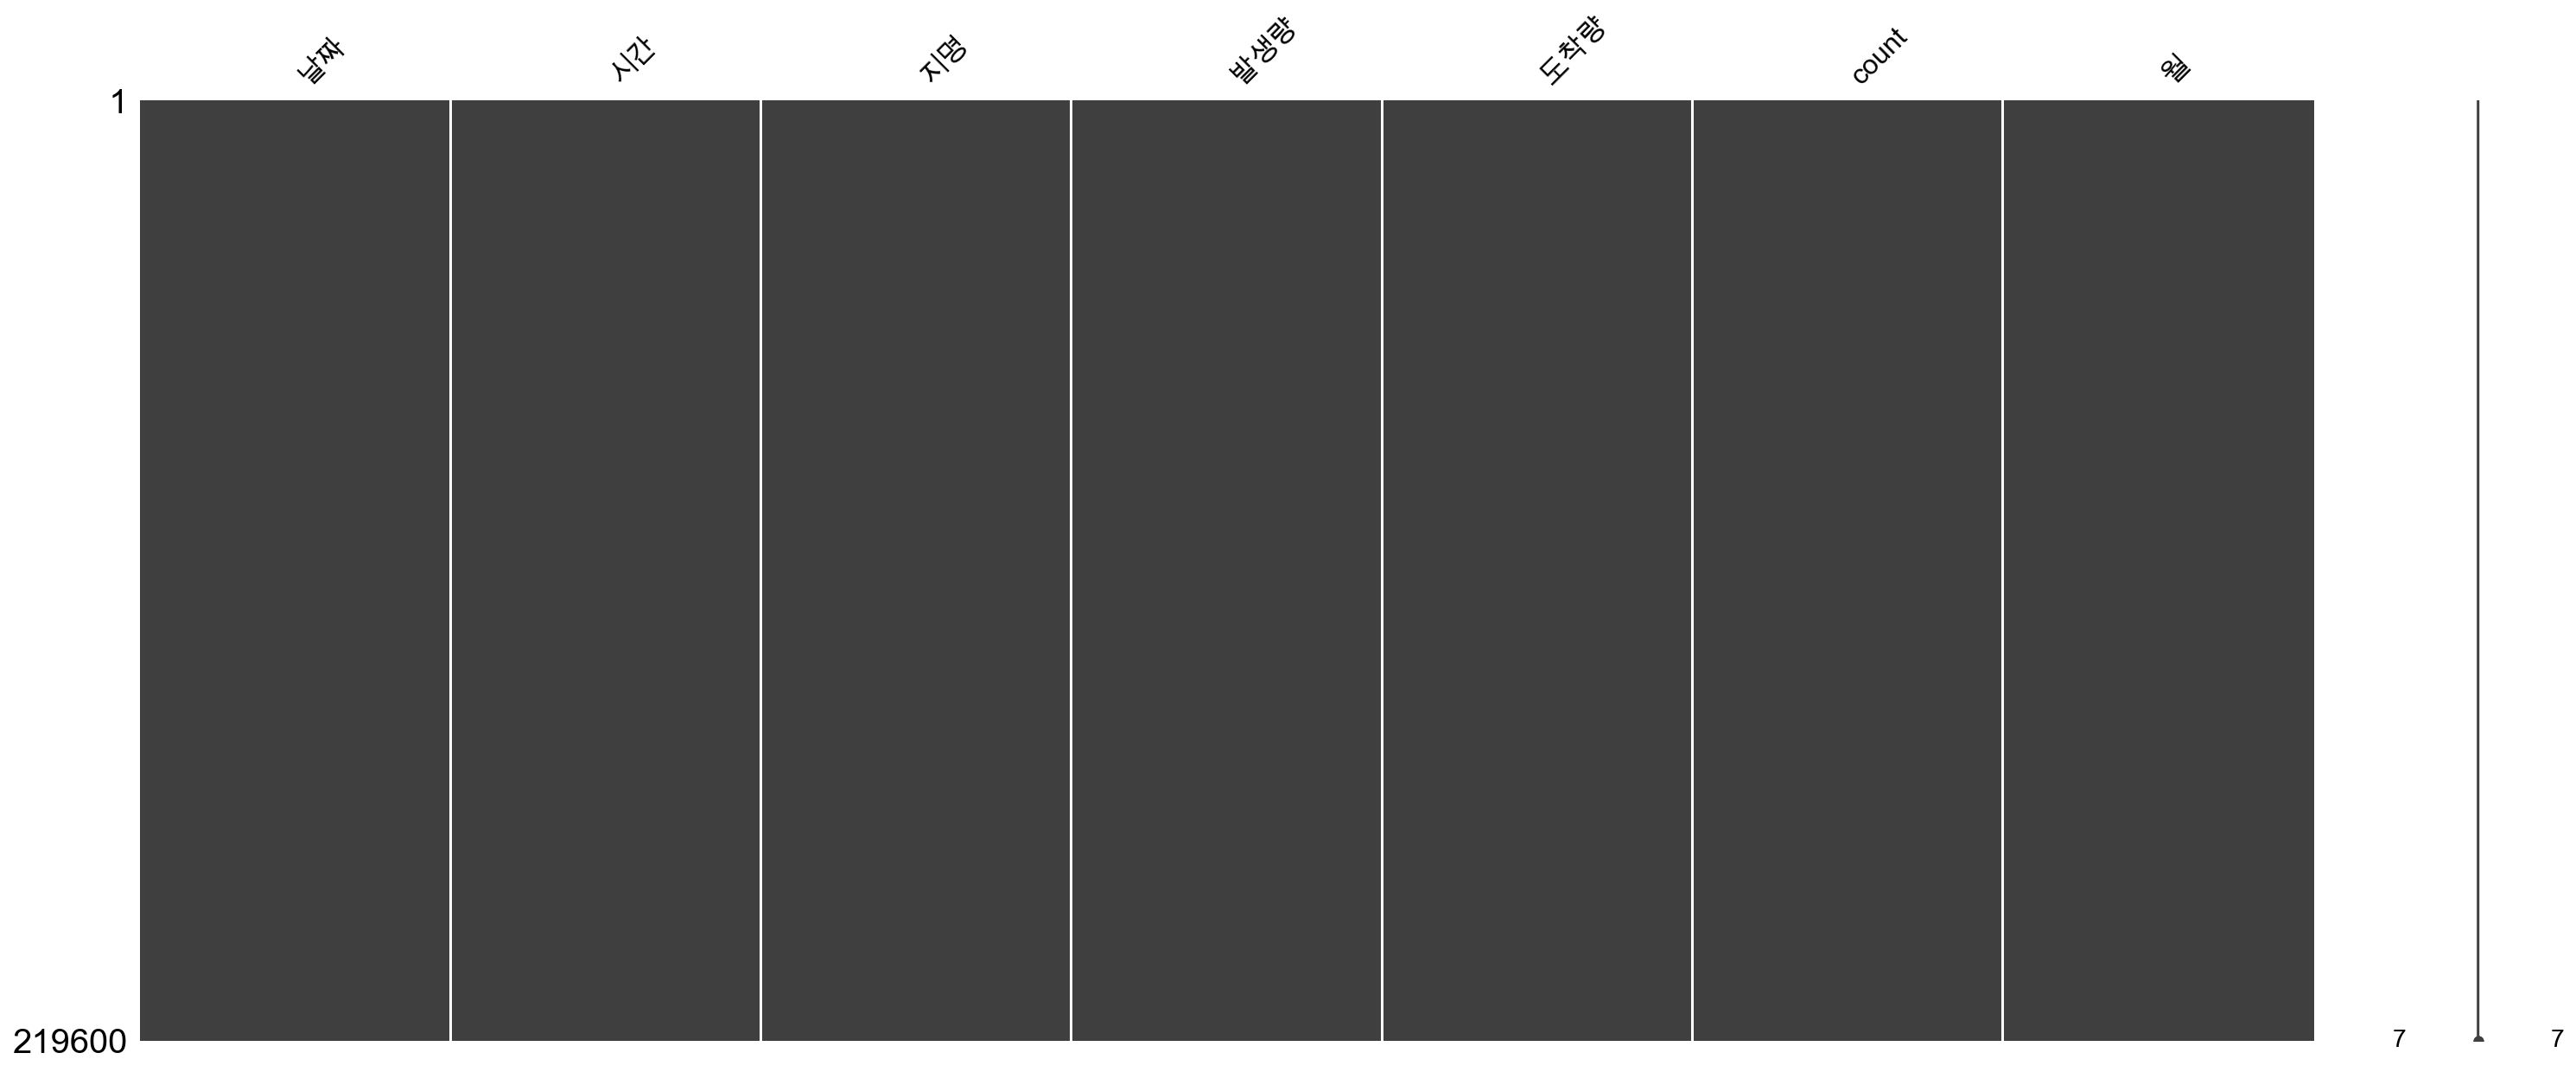

In [24]:
msno.matrix(df2)
plt.show()
#warnings.filterwarnings('ignore')

## 1-1 2019_2020 서울 전체 대중교통량 비교

In [25]:
y1 = pub_traffic_m_2019["total"].sum() 
y2 = pub_traffic_m_2020["total"].sum()
pub_rate_2019 = round(((y2 - y1) / y1 * 100), 2) # 감소량

In [26]:
pub_tans_2019 = round(pub_traffic_m_2019["total"].mean())
print("2019년 평균 통행량 :", pub_tans_2019,"대")

2019년 평균 통행량 : 676359867 대


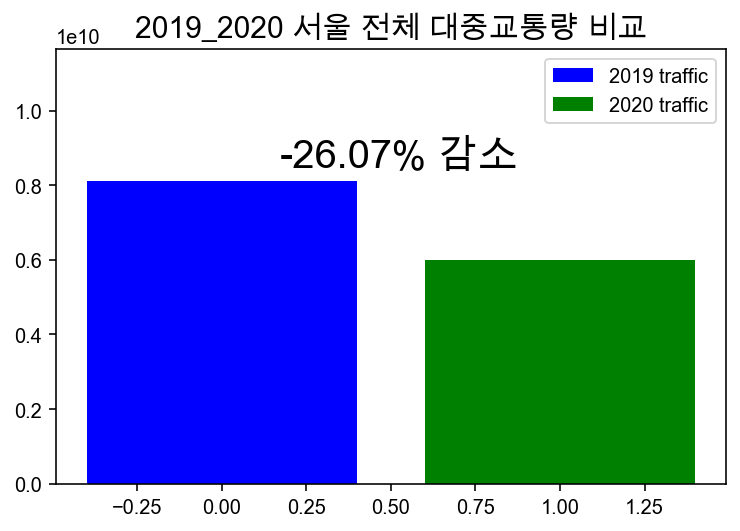

In [27]:
x1 = 0
x2 = 1
y1 = pub_traffic_m_2019["total"].sum() #2019 Total 교통량
y2 = pub_traffic_m_2020["total"].sum() #2020 Total 교통량

plt.bar(x1,y1, label='2019 traffic', color='b')
plt.bar(x2,y2, label='2020 traffic', color='g')
plt.legend()
plt.ylim([0,70*1000000000/6])
plt.text(0.17,85*100000000,pub_rate_2019,fontsize=20)
plt.text(0.5,85*100000000,"% 감소",fontsize=20)
plt.title("2019_2020 서울 전체 대중교통량 비교", fontsize = 15)

plt.show()

## 1-2 2019_2020 서울 전체 차량 통행량 비교

In [32]:
y_1 = all_traffic_m_2019["total"].sum()
y_2 = all_traffic_m_2020["total"].sum()
all_rate_2019 = round(((y_2 - y_1) / y_1 * 100), 2) # 감소량
all_rate_2019

-5.73

In [33]:
y_1 = all_traffic_m_2019["total"].sum() 
y_2 = all_traffic_m_2020["total"].sum()
all_rate_2019 = round(((y_2 - y_1) / y_1 * 100), 2) # 감소량

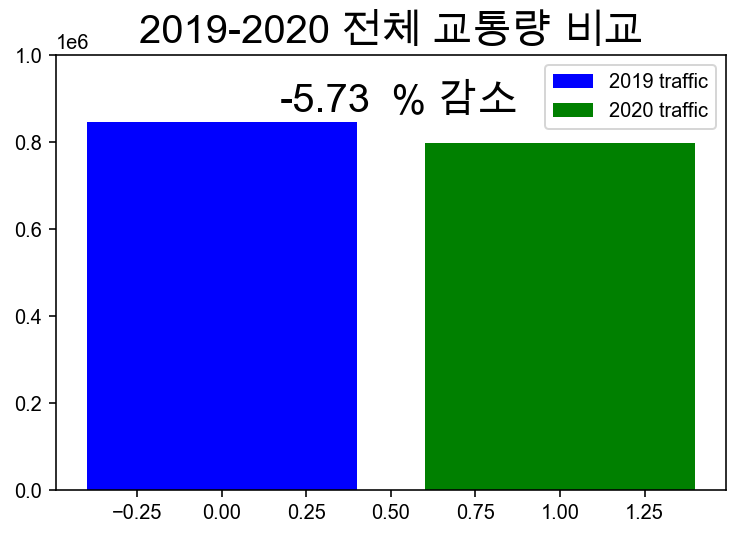

In [45]:
x1 = 0
x2 = 1
y_1 = all_traffic_m_2019["total"].sum() #2019 Total 교통량
y_2 = all_traffic_m_2020["total"].sum() #2020 Total 교통량

plt.bar(x1,y_1, label='2019 traffic', color='b')
plt.bar(x2,y_2, label='2020 traffic', color='g')

plt.legend()
plt.text(0.17,87*10000,all_rate_2019, fontsize=20) #감소량
plt.text(0.5,87*10000,"% 감소",fontsize=20) # 기호 및 설명
plt.ylim([0,1000000])
plt.title("2019-2020 전체 교통량 비교", fontsize=20)

plt.show()

# 2-1 2019-2020 월별 서울 대중 교통량 비교

In [46]:
pub_tans_2019 = round(pub_traffic_m_2019["total"].mean())
print("2019년 평균 통행량 :", pub_tans_2019,"대")

2019년 평균 통행량 : 676359867 대


In [47]:
pub_compare_2019 = pub_traffic_m_2019[pub_traffic_m_2019["total"] > pub_traffic_m_2019["total"].mean()]
df_pub_compare_2019 = pd.DataFrame(pub_compare_2019, columns=["total"])
df_pub_compare_2019

,total
월,
2019-03,695974373
2019-04,699471154
2019-05,719349046
2019-07,695624147
2019-10,711970874
2019-11,690195489
2019-12,697837963


In [48]:
pub_tans_2020 = round(pub_traffic_m_2020["total"].mean())
print("2020년 평균 통행량 :", pub_tans_2020,"대")

2020년 평균 통행량 : 500059699 대


In [49]:
pub_compare_2020 = pub_traffic_m_2020[pub_traffic_m_2020["total"] > pub_traffic_m_2020["total"].mean()]
df_pub_compare_2020 = pd.DataFrame(pub_compare_2020, columns=["total"])
df_pub_compare_2020

,total
월,
2020-01,619873025
2020-02,518782694
2020-05,503179606
2020-06,530270196
2020-07,566899895
2020-10,510247343
2020-11,516629667


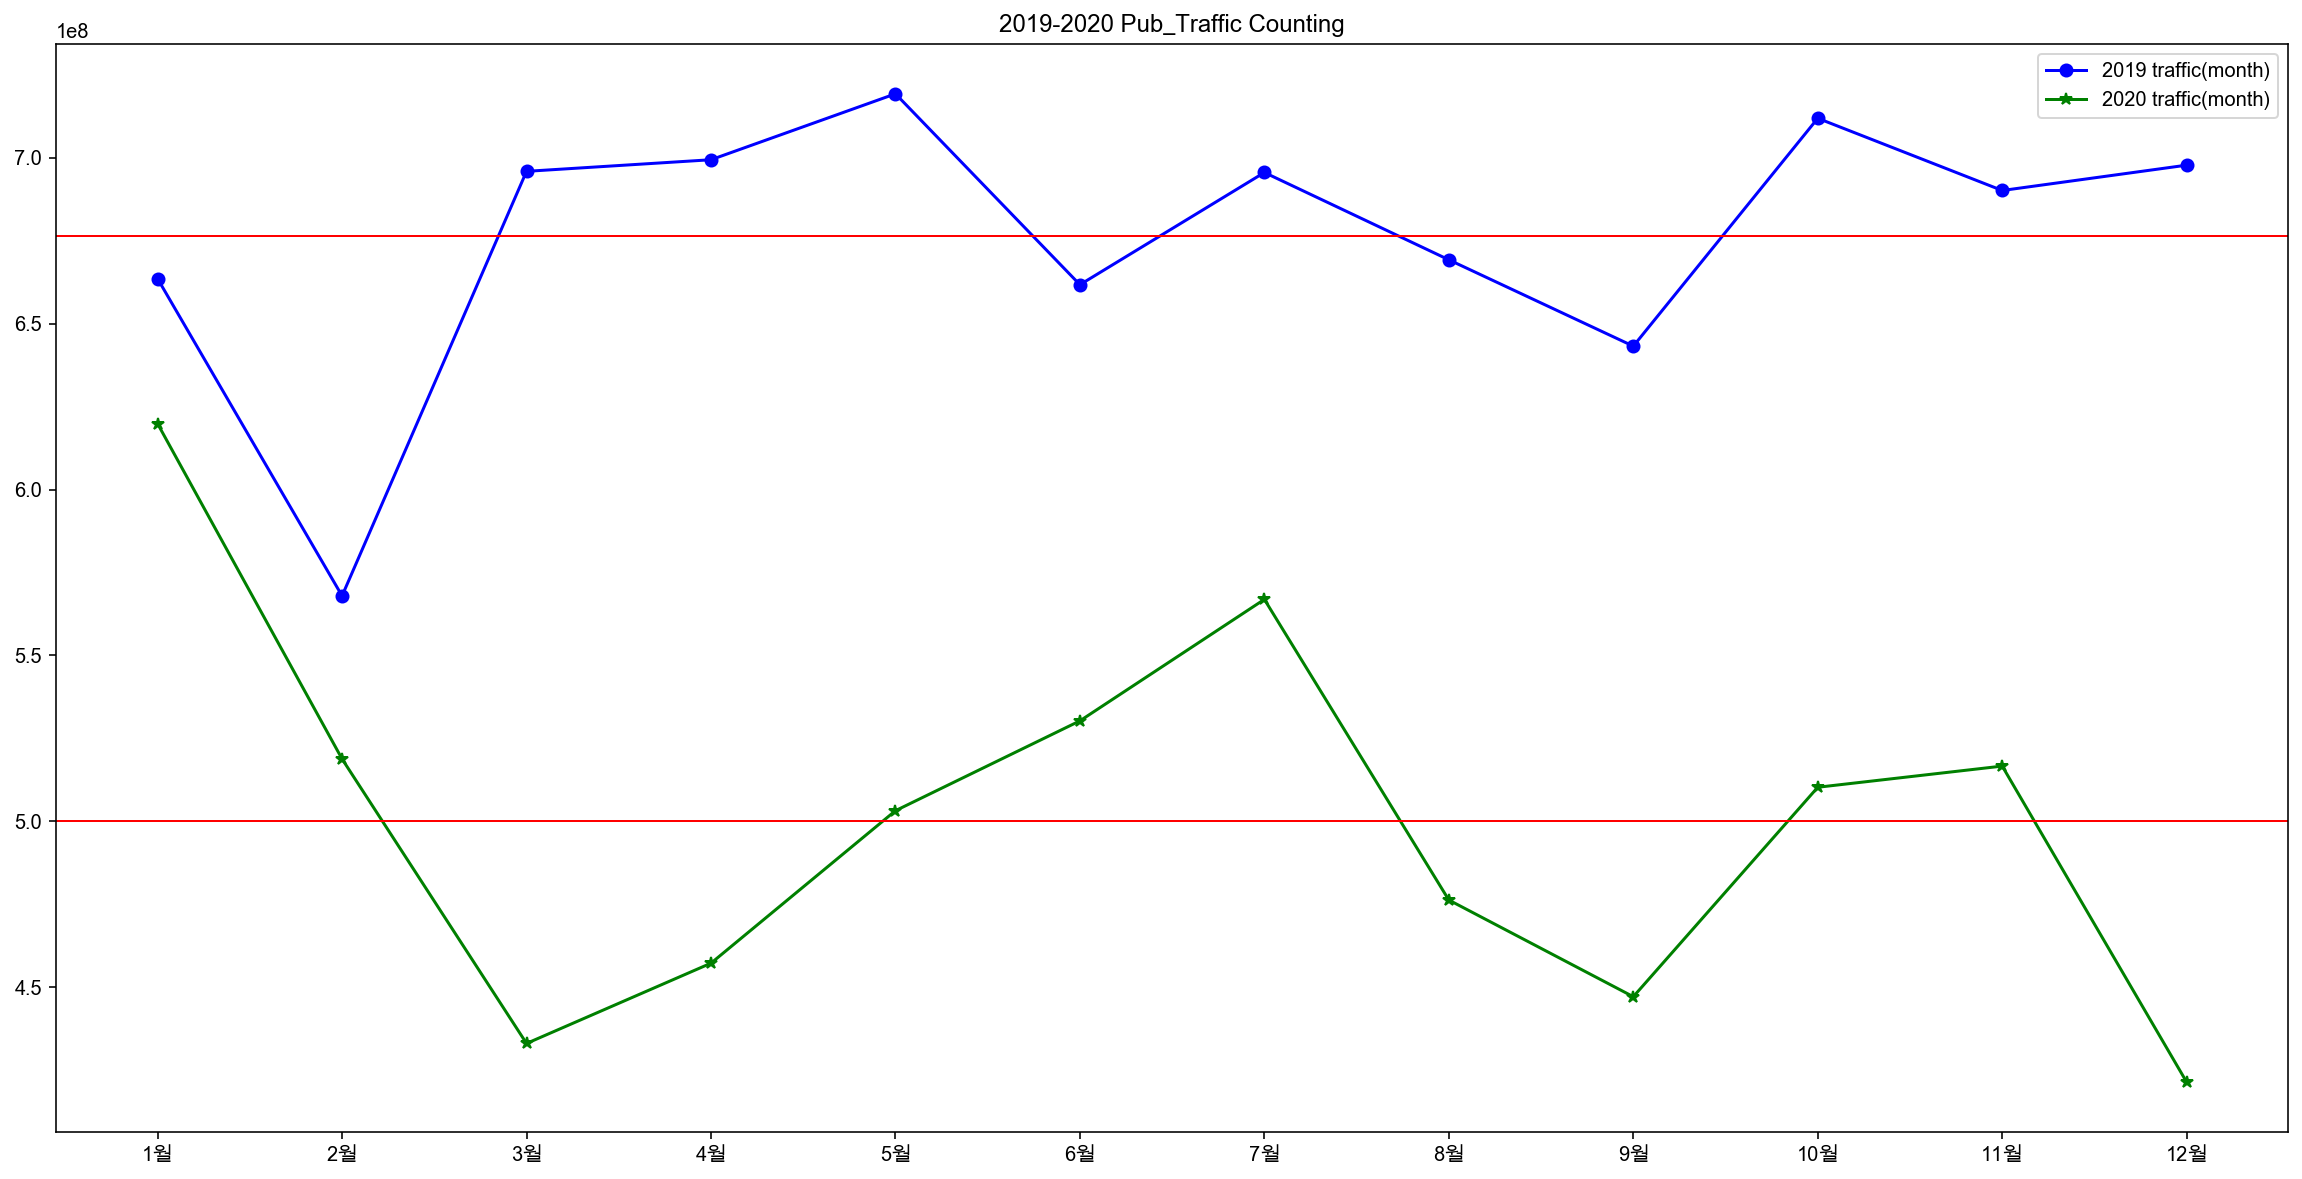

In [50]:
#X1 = ["1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"]
X = ["1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"]
y1 = pub_traffic_m_2019.total
y2 = pub_traffic_m_2020.total

plt.figure(figsize=(20, 10))
plt.plot(X,y1, label='2019 traffic(month)', color='b', marker='o')
plt.plot(X,y2, label='2020 traffic(month)', color='g', marker='*')

plt.legend()
plt.title("2019-2020 Pub_Traffic Counting")
plt.axhline(y=pub_tans_2019, color='r', linewidth=1)
plt.axhline(y=pub_tans_2020, color='r', linewidth=1)

plt.show()

# 2-2 2019-2020 월별 차량 통행량 비교

In [51]:
all_tans_2019 = round(all_traffic_m_2019["total"].mean())
print("2019년 평균 통행량 :", all_tans_2019,"대")

2019년 평균 통행량 : 70440 대


In [52]:
all_compare_2019 = all_traffic_m_2019[all_traffic_m_2019["total"] > all_traffic_m_2019["total"].mean()]
df_all_compare_2019 = pd.DataFrame(all_compare_2019, columns=["total"])
df_all_compare_2019

,total
month,
4,72791.226420
5,72098.902509
11,72354.783704
12,71778.392115


In [53]:
all_tans_2020 = round(all_traffic_m_2020["total"].mean())
print("2020년 평균 통행량 :", all_tans_2020,"대")

2020년 평균 통행량 : 66401 대


In [54]:
compare_2020 = all_traffic_m_2020[all_traffic_m_2020["total"] > all_traffic_m_2020["total"].mean()]
compare_df_2020 = pd.DataFrame(compare_2020, columns=["total"])
compare_df_2020

,total
month,
1,68659.238710
2,67650.349170
4,68121.121481
5,69638.799044
6,70124.867654
7,69819.593787


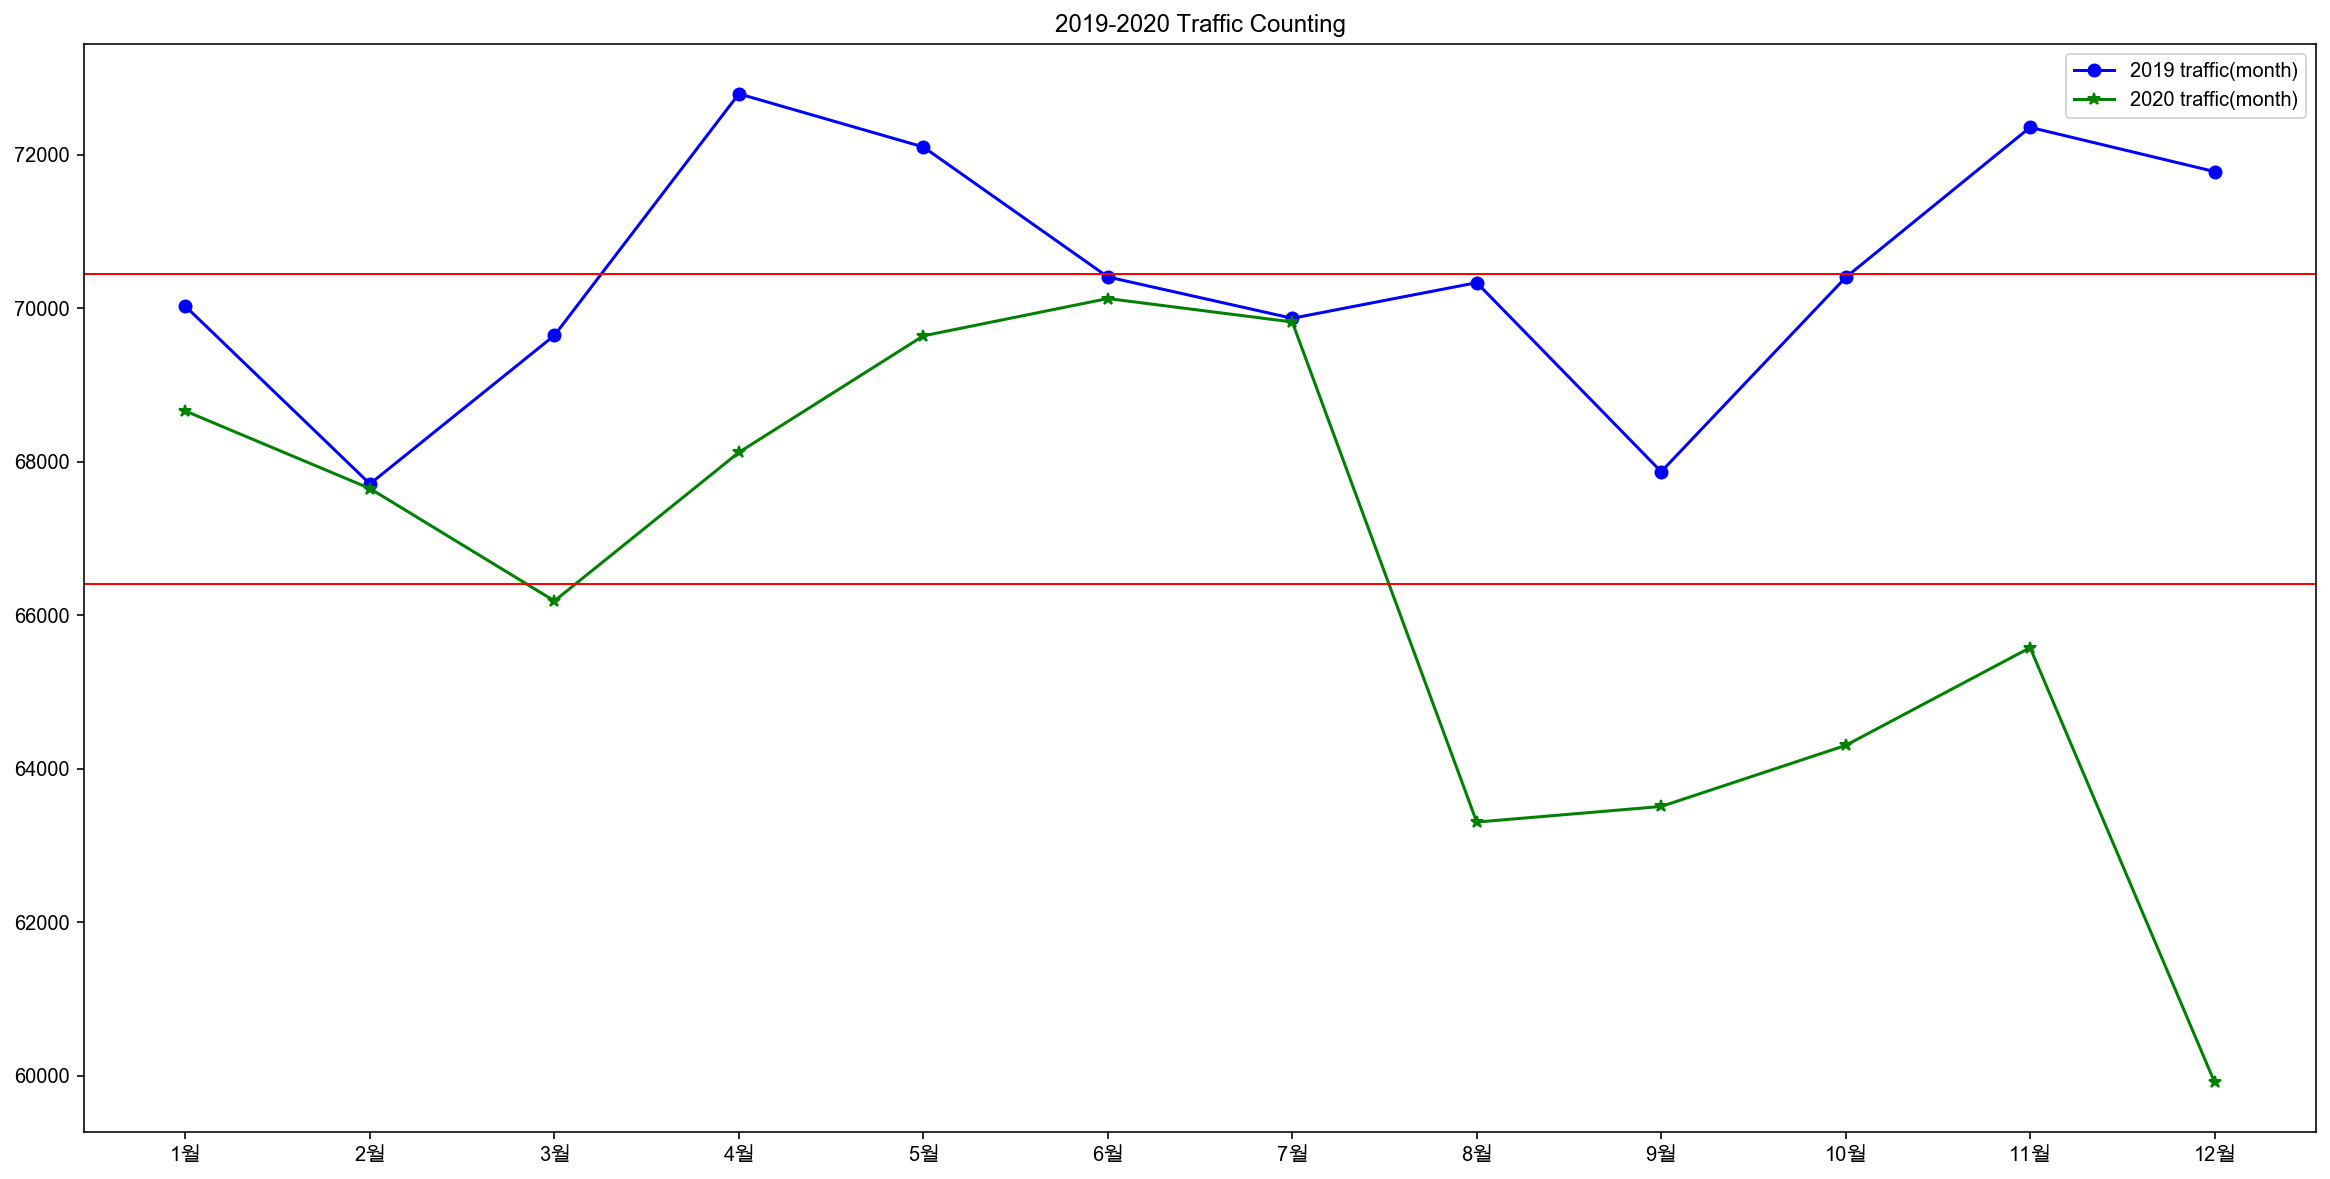

In [55]:
#X1 = ["1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"]
X = ["1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"]
y1 = all_traffic_m_2019.total
y2 = all_traffic_m_2020.total

plt.figure(figsize=(20, 10))
plt.plot(X,y1, label='2019 traffic(month)', color='b', marker='o')
plt.plot(X,y2, label='2020 traffic(month)', color='g', marker='*')

plt.legend()
plt.title("2019-2020 Traffic Counting")
plt.axhline(y=all_tans_2019, color='r', linewidth=1)
plt.axhline(y=all_tans_2020, color='r', linewidth=1)

plt.show()

## 3-1. 요일별 대중 교통량 출력

In [56]:
df1 = pd.read_csv("2019.csv")
day_pub_traffic_2019 = df1.drop(columns=["시간", "지명", "발생량", "도착량", "월"])
day_pub_traffic_2019

,날짜,count
0,2019-01-01(화),3869
1,2019-01-01(화),3393
2,2019-01-01(화),1571
3,2019-01-01(화),4798
4,2019-01-01(화),3785
...,...,...
218995,2019-12-31(화),11500
218996,2019-12-31(화),17901
218997,2019-12-31(화),26981
218998,2019-12-31(화),29817


In [57]:
data, weeks = [], ["월", "화", "수", "목", "금", "토", "일"]
for week in weeks:
    data.append(day_pub_traffic_2019[day_pub_traffic_2019["날짜"].str.contains(week)]["count"].sum())

In [58]:
day_pub_traffic_2019 = pd.DataFrame(data=data, index=weeks).reset_index()
day_pub_traffic_2019.columns = ["요일", "total"]
day_pub_traffic_2019

,요일,total
0,월,1248519518
1,화,1295266170
2,수,1271578659
3,목,1261426762
4,금,1317295673
5,토,989868437
6,일,732363190


In [59]:
df2 = pd.read_csv("2020.csv")
day_pub_traffic_2020 = df2.drop(columns=["시간", "지명", "발생량", "도착량", "월"])
day_pub_traffic_2020

,날짜,count
0,2020-01-01(수),2873
1,2020-01-01(수),3251
2,2020-01-01(수),1877
3,2020-01-01(수),3677
4,2020-01-01(수),3077
...,...,...
219595,2020-12-31(목),2483
219596,2020-12-31(목),2779
219597,2020-12-31(목),3203
219598,2020-12-31(목),3305


In [60]:
data, weeks = [], ["월", "화", "수", "목", "금", "토", "일"]
for week in weeks:
    data.append(day_pub_traffic_2020[day_pub_traffic_2020["날짜"].str.contains(week)]["count"].sum())

In [61]:
day_pub_traffic_2020 = pd.DataFrame(data=data, index=weeks).reset_index()
day_pub_traffic_2020.columns = ["요일", "total"]
day_pub_traffic_2020

,요일,total
0,월,958279301
1,화,978872517
2,수,986414298
3,목,989556461
4,금,974119077
5,토,649499462
6,일,463975271


## 3-2. 요일별 교통량 출력

In [62]:
ddf3 = pd.read_csv("./data_2019_seoultraffic.csv")
day_all_traffic_2019 = pd.DataFrame(ddf3, columns=["요일", "total"])
day_all_traffic_2019

,요일,total
0,일,42083
1,수,63520
2,목,68255
3,금,69836
4,토,59502
...,...,...
49270,금,114585
49271,토,123559
49272,일,113614
49273,월,110342


In [63]:
data, weeks = [], ["월", "화", "수", "목", "금", "토", "일"]
for week in weeks:
    data.append(day_all_traffic_2019[day_all_traffic_2019["요일"].str.contains(week)]["total"].sum())

In [64]:
day_all_traffic_2019 = pd.DataFrame(data=data, index=weeks).reset_index()
day_all_traffic_2019.columns = ["요일", "total"]
day_all_traffic_2019

,요일,total
0,월,495321251
1,화,509517933
2,수,527079819
3,목,492164038
4,금,521941567
5,토,492424776
6,일,433350226


In [65]:
ddf4 = pd.read_csv("./data_2020_seoultraffic.csv")
day_all_traffic_2020 = pd.DataFrame(ddf4, columns=["요일", "total"])
day_all_traffic_2020

,요일,total
0,수,43040
1,목,62488
2,금,67088
3,토,54995
4,일,46687
...,...,...
49405,일,95643
49406,월,96370
49407,화,96541
49408,수,97701


In [66]:
data, weeks = [], ["월", "화", "수", "목", "금", "토", "일"]
for week in weeks:
    data.append(day_all_traffic_2020[day_all_traffic_2020["요일"].str.contains(week)]["total"].sum())

In [67]:
day_all_traffic_2020 = pd.DataFrame(data=data, index=weeks).reset_index()
day_all_traffic_2020.columns = ["요일", "total"]
day_all_traffic_2020

,요일,total
0,월,475181608
1,화,486640237
2,수,493765368
3,목,498696678
4,금,495326562
5,토,454937964
6,일,375774867


# 3 요일별 대중교통 이용량 비교

### 3.1.1주말 대중교통 이용량 비교(토,일)

In [68]:
week_pub_traffic = round((np.sum(day_pub_traffic_2020["total"][-2:]) - np.sum(day_pub_traffic_2019["total"][-2:]))\
/ np.sum(day_pub_traffic_2019["total"][-2:]) * 100, 2)

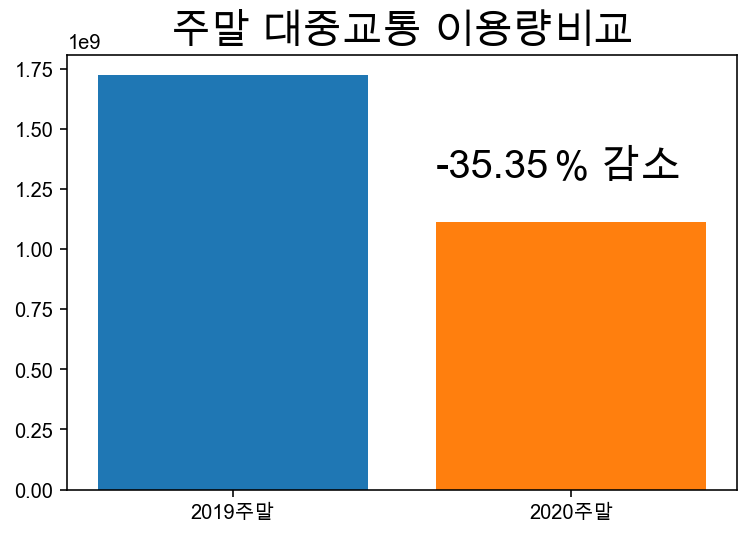

In [69]:
plt.bar("2019주말",np.sum(day_pub_traffic_2019["total"][-2:]))
plt.bar("2020주말",np.sum(day_pub_traffic_2020["total"][-2:]))

a = np.sum(day_pub_traffic_2019["total"][-2:])
b = np.sum(day_pub_traffic_2020["total"][-2:])

plt.text(0.6, 130*10000000,week_pub_traffic, fontsize=20)
plt.text(0.95, 130*10000000,"% 감소",fontsize=20)
plt.title("주말 대중교통 이용량비교", fontsize = 20)

plt.show()

### 3.1.2 주말 차량 통행량 비교(토,일)

In [70]:
week_all_traffic = round((np.sum(day_all_traffic_2020["total"][-2:]) - np.sum(day_all_traffic_2019["total"][-2:]))\
/ np.sum(day_all_traffic_2019["total"][-2:]) * 100, 2)

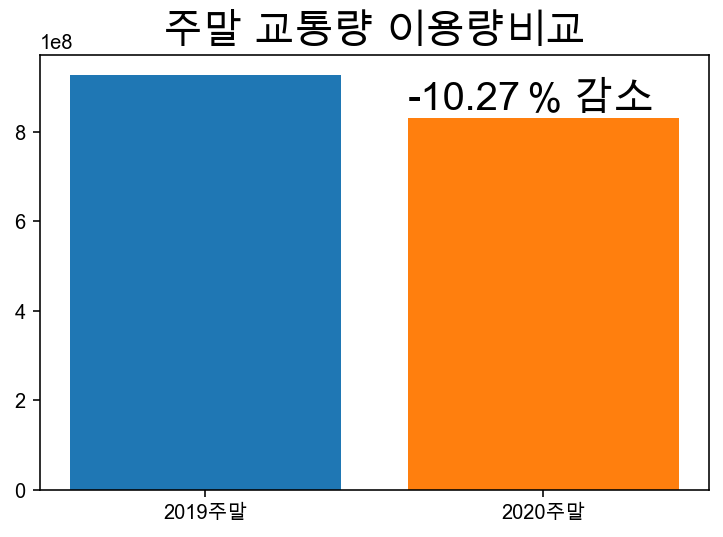

In [71]:
plt.bar("2019주말",np.sum(day_all_traffic_2019["total"][-2:]))
plt.bar("2020주말",np.sum(day_all_traffic_2020["total"][-2:]))

a = np.sum(day_all_traffic_2019["total"][-2:])
b = np.sum(day_all_traffic_2020["total"][-2:])

plt.text(0.6, 85*10000000,week_all_traffic, fontsize=20)
plt.text(0.95, 85*10000000,"% 감소",fontsize=20)
plt.title("주말 교통량 이용량비교", fontsize = 20)

plt.show()

### 3.2.1 평일 대중교통 이용량 비교(월-금)

In [72]:
day_pub_traffic = round((np.sum(day_pub_traffic_2020["total"][:-2]) - np.sum(day_pub_traffic_2019["total"][:-2]))\
/ np.sum(day_pub_traffic_2019["total"][:-2]) * 100, 2)

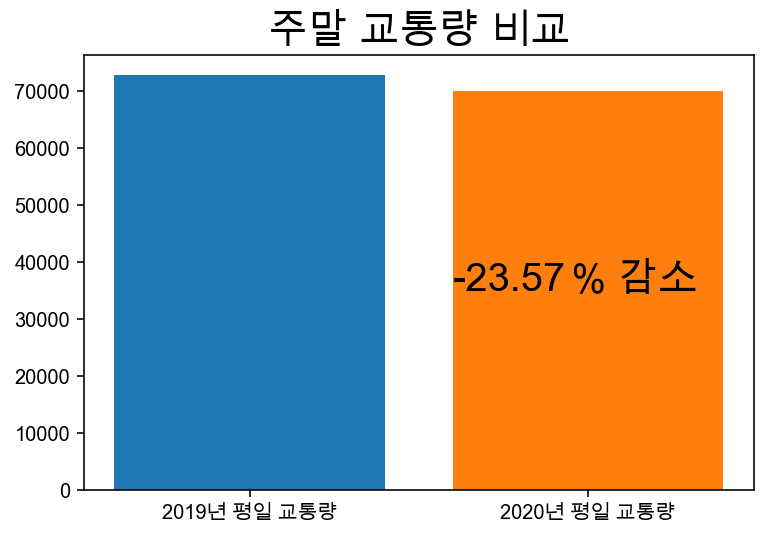

In [73]:
plt.bar("2019년 평일 교통량", y1)
plt.bar("2020년 평일 교통량", y2)

a = np.sum(day_pub_traffic_2019["total"][:-2])
b = np.sum(day_pub_traffic_2020["total"][:-2])

plt.text(0.6, 35*1000,day_pub_traffic, fontsize=20)
plt.text(0.95, 35*1000,"% 감소",fontsize=20)
plt.title("주말 교통량 비교", fontsize = 20)
plt.show()

### 3.2.2 평일 차량통행량 비교(월-금)

In [74]:
day_all_traffic = round((np.sum(day_all_traffic_2020["total"][:-2]) - np.sum(day_all_traffic_2019["total"][:-2]))\
/ np.sum(day_all_traffic_2019["total"][:-2]) * 100, 2)

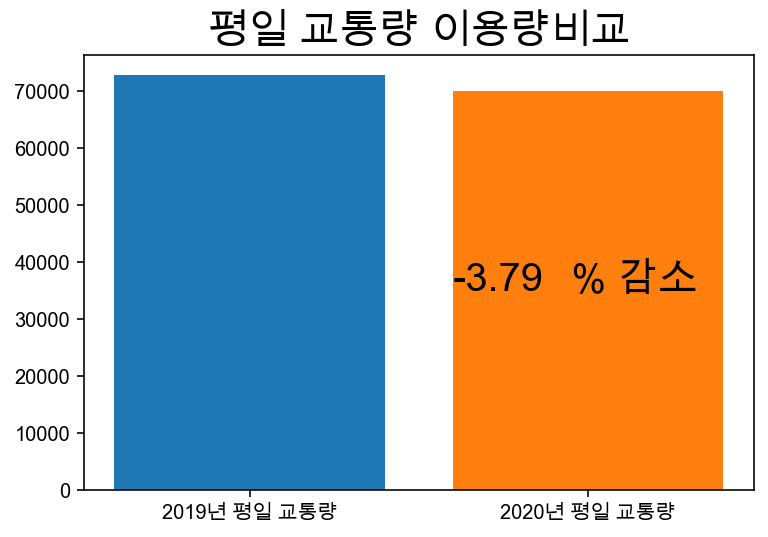

In [75]:
plt.bar("2019년 평일 교통량", y1)
plt.bar("2020년 평일 교통량", y2)

a = np.sum(day_all_traffic_2019["total"][:-2])
b = np.sum(day_all_traffic_2020["total"][:-2])

plt.text(0.6, 35*1000,day_all_traffic, fontsize=20)
plt.text(0.95, 35*1000,"% 감소",fontsize=20)
plt.title("평일 교통량 이용량비교", fontsize = 20)
plt.show()

## 4.지역별 비교

### 4.1지역별 대중교통량 비교

In [76]:
pub_traffic_r_2019.loc[:,'region'] = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', \
                                  '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', \
                                 '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구' ]

pub_traffic_r_2019.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,total,region
지명,,,,,,,,,,,,,,,,,,,,,
중구,3518016,572340,239087,215153,501450,3155734,5716093,12502745,25150575,18739397,...,29865336,37557276,55470515,38990793,27587356,25132393,21287791,12756123,447485581,중구
중랑구,1429246,237634,75320,66496,865449,3163495,6457136,15182553,22283249,13902473,...,11444769,12500258,14244402,12439521,8442147,7587105,6741702,3980054,199074236,중랑구


In [77]:
pub_traffic_r_2019['total'].mean()

324652736.36

In [78]:
pub_traffic_r_2019_a = round(pub_traffic_r_2019['total'].mean())
print("2019년 평균 통행량 :", pub_traffic_r_2019_a,"대")

2019년 평균 통행량 : 324652736 대


In [79]:
r_p_compare_2019 = pub_traffic_r_2019[pub_traffic_r_2019["total"] > pub_traffic_r_2019["total"].mean()]
df_r_p_compare_2019 = pd.DataFrame(r_p_compare_2019, columns=["total"])
df_r_p_compare_2019

,total
지명,
강남구,737727211
강서구,345163358
관악구,379996454
구로구,377044464
마포구,408143716
서초구,508376369
송파구,475428128
영등포구,411573195
종로구,410146010


In [80]:
pub_traffic_r_2020.loc[:,'region'] = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', \
                                   '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', \
                                 '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구' ]

pub_traffic_r_2020.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,total,region
지명,,,,,,,,,,,,,,,,,,,,,
중구,1030686,267406,125901,144638,524518,2845992,6134273,15971819,33999864,20472449,...,17012446,23538009,33093127,18656846,13260295,11477169,8628758,4649330,295154710,중구
중랑구,999460,179205,71499,63145,722886,2550547,4890796,10808463,14961209,8788647,...,8997200,10484633,13326202,11698006,7464722,6621289,5495151,3253670,153829883,중랑구


In [81]:
pub_traffic_r_2020_a = round(pub_traffic_r_2020['total'].mean())
print("2020년 평균 통행량 :", pub_traffic_r_2020_a,"대")

2020년 평균 통행량 : 240028655 대


In [82]:
r_p_compare_2020 = pub_traffic_r_2020[pub_traffic_r_2020["total"] > pub_traffic_r_2020["total"].mean()]
df_r_p_compare_2020 = pd.DataFrame(r_p_compare_2020, columns=["total"])
df_r_p_compare_2020

,total
지명,
강남구,567110115
강서구,260342153
관악구,289329188
구로구,283206229
마포구,290281580
서초구,368079647
송파구,351362444
영등포구,311535742
종로구,280859306


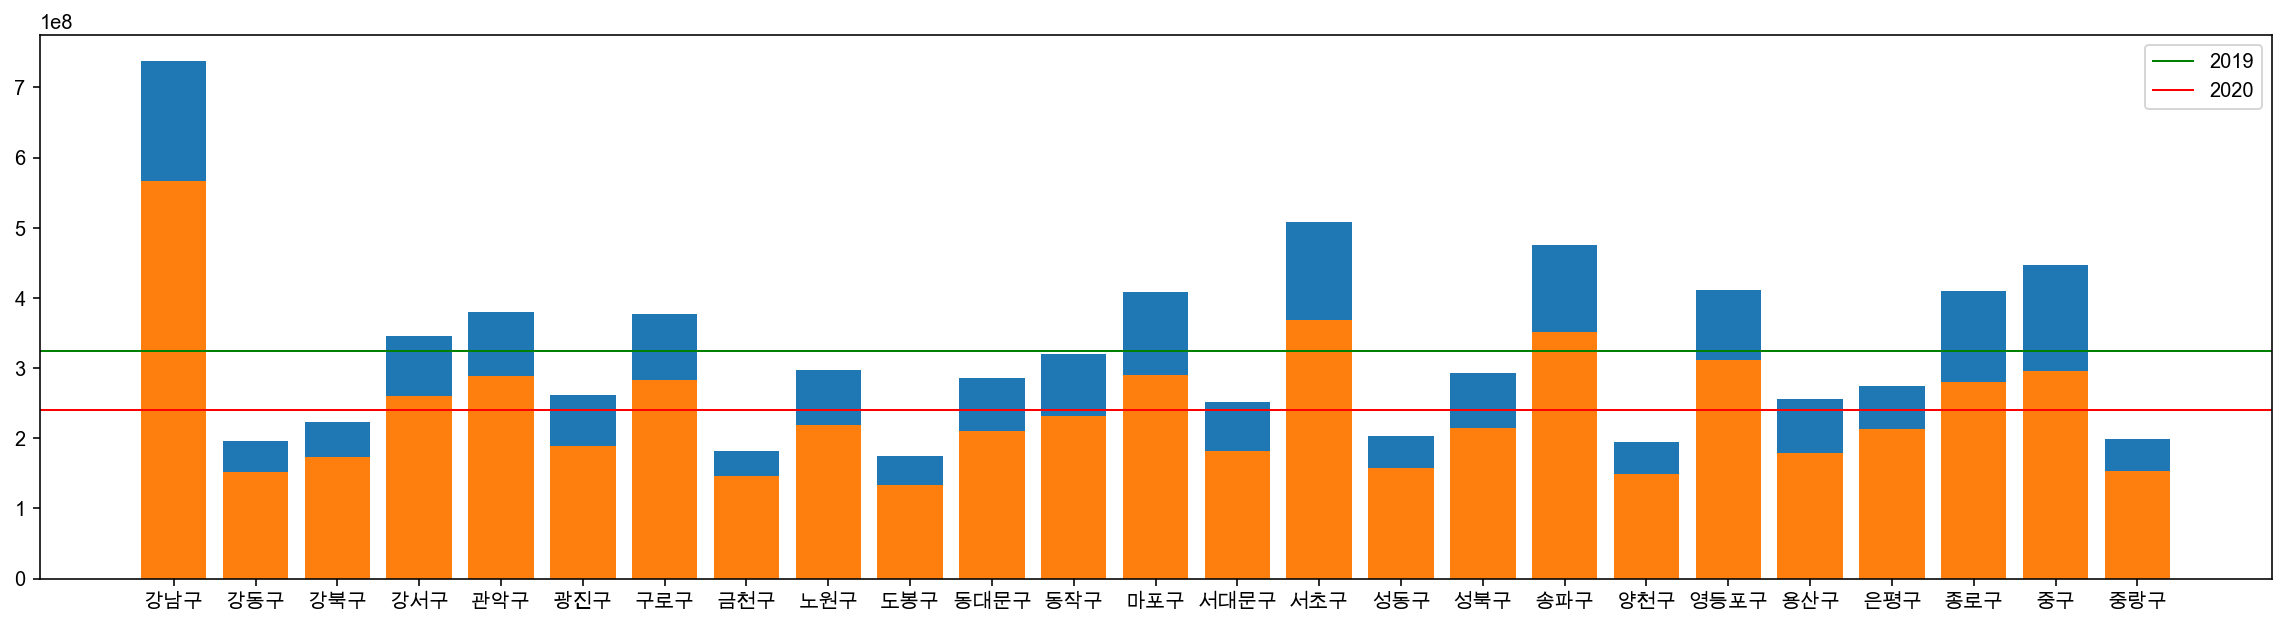

In [83]:
plt.figure(figsize=(20, 5))

X = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', \
    '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', \
    '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구' ]

plt.bar(X, pub_traffic_r_2019["total"])
plt.bar(X, pub_traffic_r_2020["total"])

plt.axhline(y=pub_traffic_r_2019['total'].mean(), color='g', linewidth=1, label="2019")
plt.axhline(y=pub_traffic_r_2020['total'].mean(), color='r', linewidth=1, label="2020")
plt.legend()

plt.show()

### 4.2지역별 차량 교통량 비교

In [96]:
all_traffic_r_2019.loc[:, '구'] = ["강남구", "강동구", "강서구", "과천시", "관악구", "광명시", "광진구", "구로구", "구리시", "금천구",\
"김포시", "노원구", "도봉구", "동작구", "마포구", "부천시", "서초구", "성동구", "성북구", "송파구", "양천구", "용산구",\
"은평구", "종로구", "중랑구", "하남시", "고양시", "금천구", "동대문구", "서대문구", "영등포구", " 중구"]

all_traffic_r_2019.tail(2)

,total,구,연도
구,,,
영등포구,70866.447123,영등포구,2019
중구,37562.815068,중구,2019


In [97]:
all_traffic_r_2019['total'].mean()

73020.93847725049

In [98]:
all_traffic_r_2019_a = round(all_traffic_r_2019['total'].mean())
print("2019년 평균 통행량 :", all_traffic_r_2019_a,"대")

2019년 평균 통행량 : 73021 대


In [99]:
r_a_compare_2019 = all_traffic_r_2019[all_traffic_r_2019["total"] > all_traffic_r_2019["total"].mean()]
df_a_p_compare_2019 = pd.DataFrame(r_p_compare_2019, columns=["total"])
df_a_p_compare_2019

,total
지명,
강남구,737727211
강서구,345163358
관악구,379996454
구로구,377044464
마포구,408143716
서초구,508376369
송파구,475428128
영등포구,411573195
종로구,410146010


In [100]:
all_traffic_r_2020_a = round(all_traffic_r_2020['total'].mean())
print("2020년 평균 통행량 :", all_traffic_r_2020_a,"대")

2020년 평균 통행량 : 70227 대


In [101]:
r_a_compare_2020 = all_traffic_r_2020[all_traffic_r_2020["total"] > all_traffic_r_2020["total"].mean()]
df_a_p_compare_2020 = pd.DataFrame(r_p_compare_2020, columns=["total"])
df_a_p_compare_2020

,total
지명,
강남구,567110115
강서구,260342153
관악구,289329188
구로구,283206229
마포구,290281580
서초구,368079647
송파구,351362444
영등포구,311535742
종로구,280859306


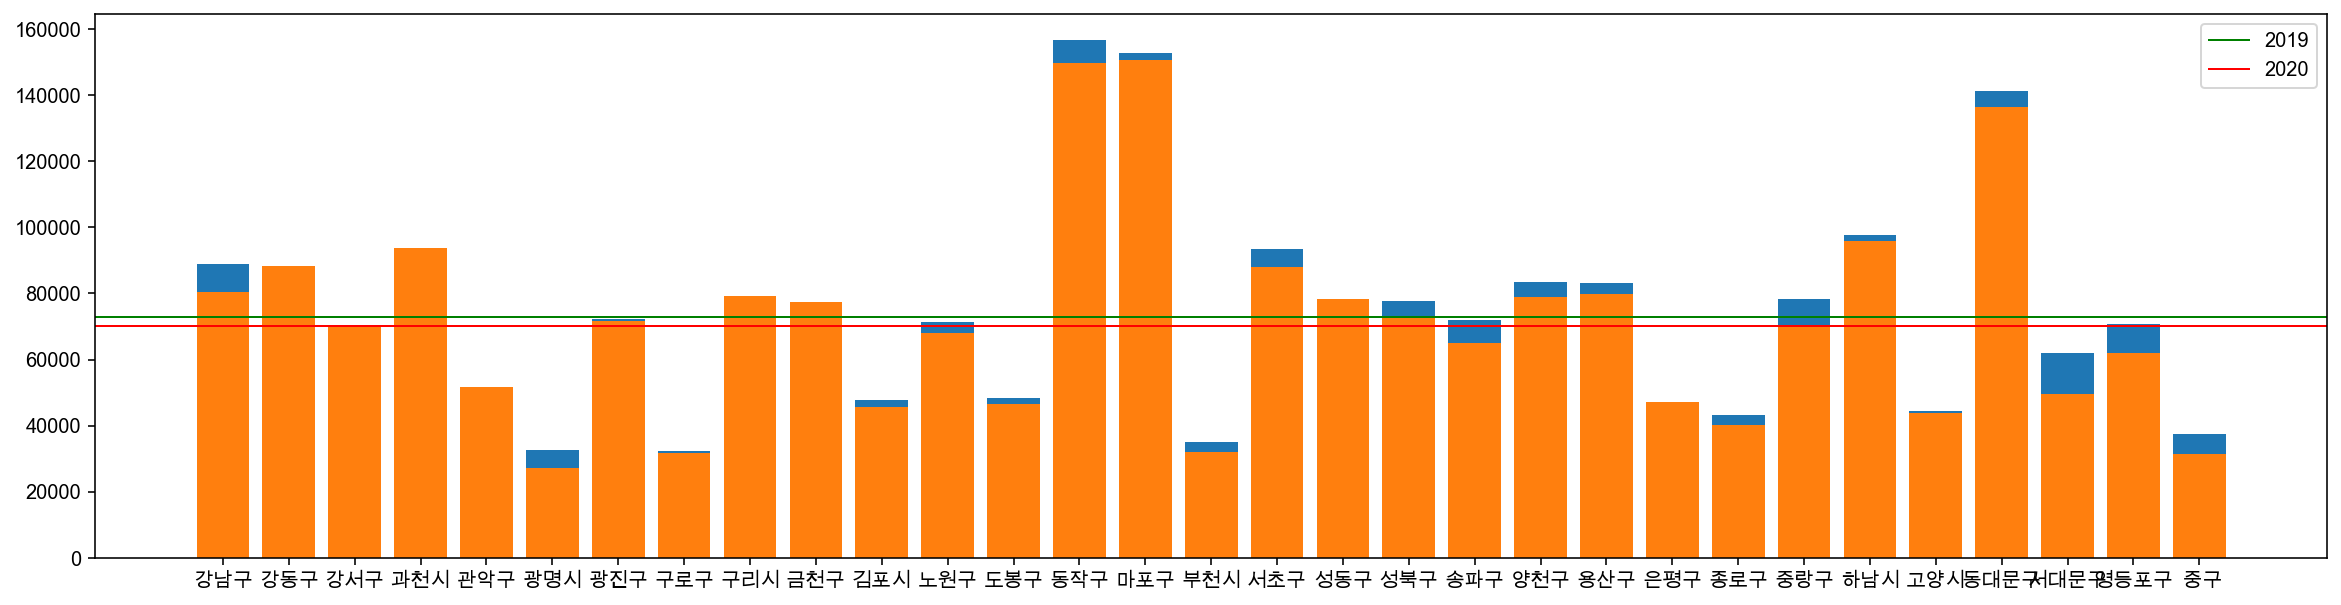

In [122]:
plt.figure(figsize=(20, 5))


X = ["강남구", "강동구", "강서구", "과천시", "관악구", "광명시", "광진구", "구로구", "구리시", "금천구",\
"김포시", "노원구", "도봉구", "동작구", "마포구", "부천시", "서초구", "성동구", "성북구", "송파구", "양천구", "용산구",\
"은평구", "종로구", "중랑구", "하남시", "고양시", "금천구", "동대문구", "서대문구", "영등포구", " 중구"]

plt.bar(X, all_traffic_r_2019["total"])
plt.bar(X, all_traffic_r_2020["total"])

plt.axhline(y=all_traffic_r_2019['total'].mean(), color='g', linewidth=1, label="2019")
plt.axhline(y=all_traffic_r_2020['total'].mean(), color='r', linewidth=1, label="2020")
plt.legend()

plt.show()

In [131]:
corona = pd.read_csv('/Users/ijiyeong/Downloads/seoul_corona.csv')
a = pd.DataFrame(corona, columns=["월","연번","지역"])
a

,월,연번,지역
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
19387,NaN,NaN,NaN
19388,NaN,NaN,NaN
19389,NaN,NaN,NaN
19390,NaN,NaN,NaN


In [132]:
corona = pd.read_csv('/Users/ijiyeong/Downloads/서울시 코로나19 확진자 현황.csv')
a = pd.DataFrame(corona, columns=["연번","지역"])
a

,연번,지역
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
34850,NaN,NaN
34851,NaN,NaN
34852,NaN,NaN
34853,NaN,NaN
